# cardiovascular patients detection with Naive Bayes
The source code is a simple implementation for cardiovascular patients detection from scratch with the python programming language and Naive Bayes. In source (1), it is assumed that all discrete variables are independent and all continuous variables are in a multivariate normal distribution. Also, in source (2), it is assumed that all variables are independent, and it is analyzed the effect of removing two features. 

### Note
This code was written as my Machine Learning course's assignment in the fall of 2021, so it may have some bugs to fix or be coded more optimally.

### GitHub
https://github.com/MohsenEbadpour

In [6]:
import numpy as np
import pandas as pd 
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14,7)

data = pd.read_csv("./heart.csv")
discrete = ["sex","cp", "fbs","restecg","exang","slope", "ca", "thal"]
continuse = ["trestbps","age","oldpeak","thalach","chol",]


data.sample(frac=1).reset_index(drop=True) 
data_train, data_test = train_test_split(data, test_size=0.30)
data_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
684,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
994,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
274,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
494,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
492,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
332,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [7]:
def ContinuseProbabilityCalculate(x, mean, stdev):
    ex = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * np.pi) * stdev)) * ex

def ProbabilityCalculate(x,data_temp,target,exclude = []):
    Prob = data_temp['target'].value_counts()[target] / sum(list((data_temp['target'].value_counts()))) 
    
    data_temp = data_temp.loc[data_temp['target'] == target]
    
    for feature in continuse:
        if feature in exclude : 
            continue
        stdev = data_temp[feature].std()
        mean = data_temp[feature].mean()
        Prob *= ContinuseProbabilityCalculate(x[feature],mean,stdev)
    
    for feature in discrete :
        if feature in exclude : 
            continue
        Prob *=  data_temp[feature].value_counts()[x[feature]]/ sum(list((data_temp[feature].value_counts()))) 
    
    return Prob
        
    

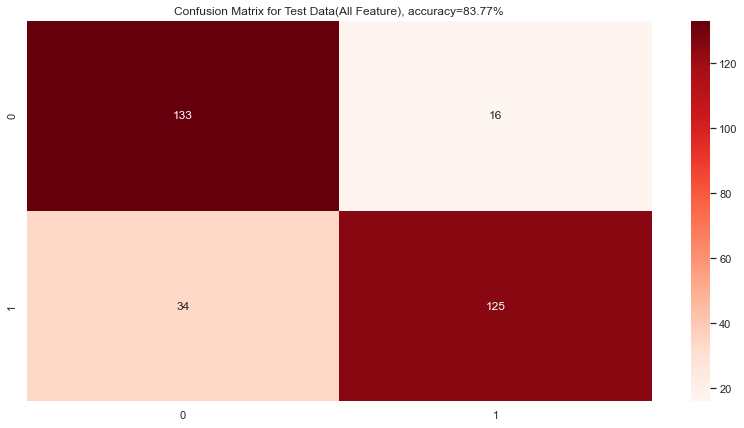

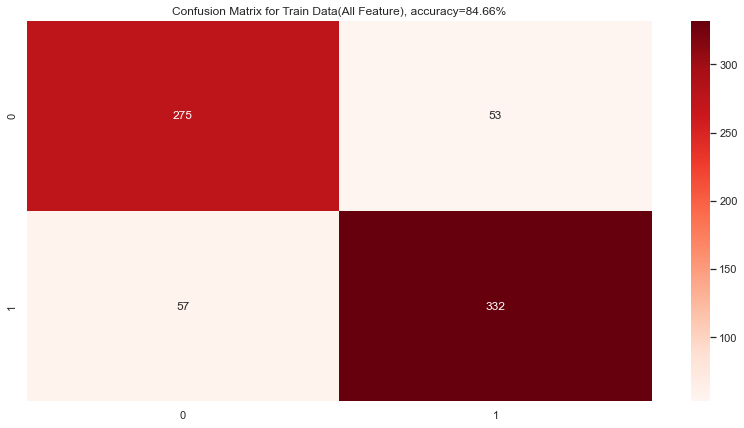

In [8]:
confusion_matrix_test = []
confusion_matrix_train = []

for _ in range(2):
    confusion_matrix_test.append([int(0),int(0)])
    confusion_matrix_train.append([int(0),int(0)])

for test in data_test.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0)
    p_1 = ProbabilityCalculate(test,data_train,1)
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_test[predict][test["target"]] += 1
for test in data_train.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0)
    p_1 = ProbabilityCalculate(test,data_train,1)
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_train[predict][test["target"]] += 1

acc = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/data_test.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_test ,annot=True, cmap='Reds', fmt='g').set_title("Confusion Matrix for Test Data(All Feature), accuracy={0}%".format(acc))
plt.show()

acc = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/data_train.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_train ,annot=True, cmap='Reds', fmt='g').set_title("Confusion Matrix for Train Data(All Feature), accuracy={0}%".format(acc))
plt.show()

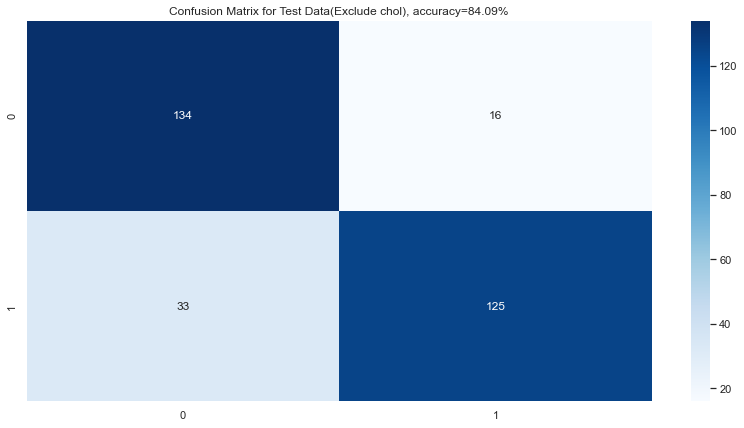

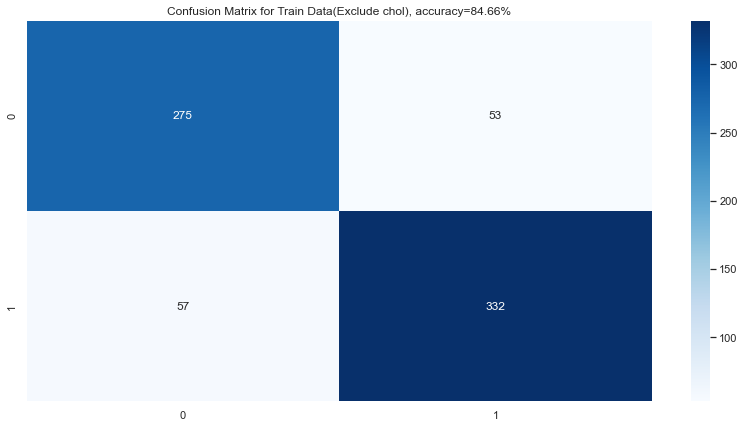

In [9]:

confusion_matrix_test = []
confusion_matrix_train = []
for _ in range(2):
    confusion_matrix_test.append([int(0),int(0)])
    confusion_matrix_train.append([int(0),int(0)])

    
for test in data_test.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0,["chol"])
    p_1 = ProbabilityCalculate(test,data_train,1,["chol"])
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_test[predict][test["target"]] += 1

for test in data_train.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0,["chol"])
    p_1 = ProbabilityCalculate(test,data_train,1,["chol"])
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_train[predict][test["target"]] += 1

acc = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/data_test.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_test ,annot=True, cmap='Blues', fmt='g').set_title("Confusion Matrix for Test Data(Exclude chol), accuracy={0}%".format(acc))
plt.show()

acc = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/data_train.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_train ,annot=True, cmap='Blues', fmt='g').set_title("Confusion Matrix for Train Data(Exclude chol), accuracy={0}%".format(acc))
plt.show()


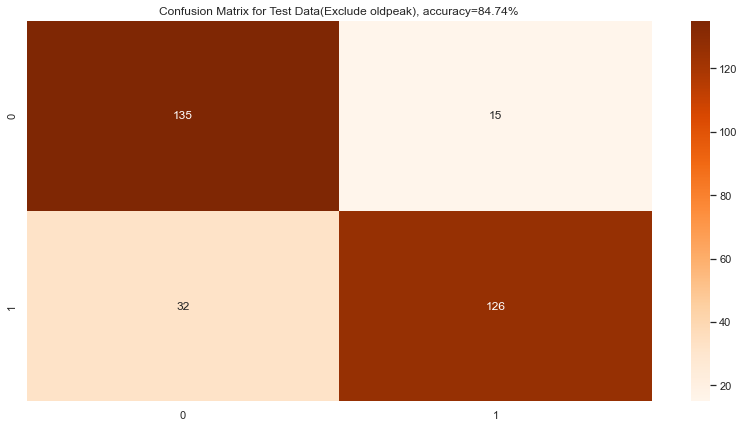

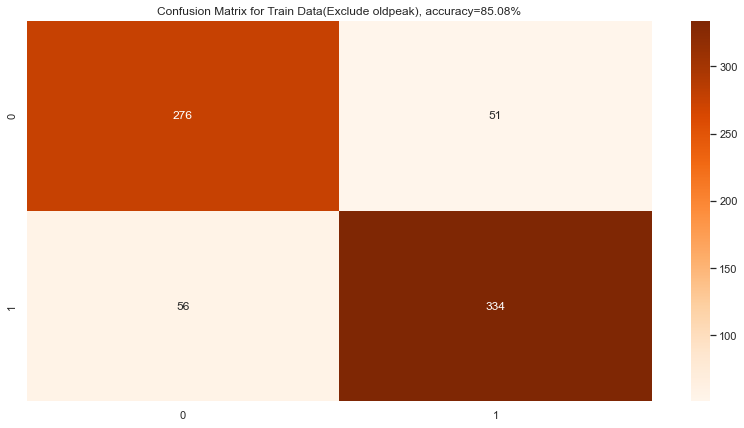

In [10]:

confusion_matrix_test = []
confusion_matrix_train = []
for _ in range(2):
    confusion_matrix_test.append([int(0),int(0)])
    confusion_matrix_train.append([int(0),int(0)])

for test in data_test.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0,["oldpeak"])
    p_1 = ProbabilityCalculate(test,data_train,1,["oldpeak"])
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_test[predict][test["target"]] += 1
    
for test in data_train.to_dict('records') :    
    p_0 = ProbabilityCalculate(test,data_train,0,["oldpeak"])
    p_1 = ProbabilityCalculate(test,data_train,1,["oldpeak"])
    predict = 1
    if p_0 > p_1 :
        predict = 0
        
    confusion_matrix_train[predict][test["target"]] += 1

acc = ((confusion_matrix_test[0][0]+confusion_matrix_test[1][1])/data_test.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_test ,annot=True, cmap='Oranges', fmt='g').set_title("Confusion Matrix for Test Data(Exclude oldpeak), accuracy={0}%".format(acc))
plt.show()

acc = ((confusion_matrix_train[0][0]+confusion_matrix_train[1][1])/data_train.shape[0])*100
acc = round(acc,2)
sns.heatmap(confusion_matrix_train ,annot=True, cmap='Oranges', fmt='g').set_title("Confusion Matrix for Train Data(Exclude oldpeak), accuracy={0}%".format(acc))
plt.show()
